Trying out mean field variational inference on image denoising

In [277]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, PCA, FastICA
import numpy as np
%matplotlib inline

In [278]:
dataset = fetch_olivetti_faces(shuffle=True)
X = dataset.data

In [279]:
#Select a face
X = X[4].reshape(64,64)

In [280]:
X[X<0.5] = -1.
X[X>=0.5] = 1.

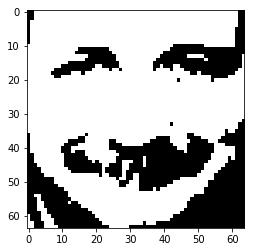

In [281]:
imshow(X, cmap="gray")

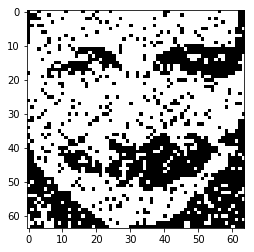

In [282]:
gamma = 0.99
p = np.exp(gamma) / (np.exp(gamma) + np.exp(-gamma))
M = np.random.choice(a=[1, -1], p=[p, 1-p], size=(64,64))
Y = X * M
imshow(Y, cmap="gray")

In [283]:
Q = np.random.rand(64,64)

In [284]:
gamma=0.99

In [285]:
def calculate_unnormalized_log_p(x, y, gamma=gamma):
    sum_x = 0
    for i in range(1,5):
        sum_x += x[0]*x[i]
    sum_x_y = 0
    for i in range(0,5):
        sum_x_y += gamma*x[i]*y[i]
    total_sum = sum_x + sum_x_y
    """print(x)
    print(y)
    print(sum_x, sum_x_y, total_sum)"""
    return total_sum

def getqy(Q,Y,i,j):
    q0 = Q[i, j]
    q1 = Q[i-1, j] 
    q2 = Q[i, j-1]
    q3 = Q[i+1, j]
    q4 = Q[i, j+1]
    y0 = Y[i, j]
    y1 = Y[i-1, j] 
    y2 = Y[i, j-1]
    y3 = Y[i+1, j]
    y4 = Y[i, j+1]
    q = [q0, q1, q2, q3, q4]
    y = [y0, y1, y2, y3, y4]
    return q,y

def calculate_exp(x0, q, y):
    total_exp = 0
    for comb in itertools.product([1,-1],[1,-1],[1,-1],[1,-1]):
        q_temp = np.array(q)
        x = [x0]
        x = np.array(x + list(comb))
        q_temp[x == -1] = (1 - q_temp)[x == -1]
        log_p = calculate_unnormalized_log_p(x, y)
        total_exp += q_temp[1]*q_temp[2]*q_temp[3]*q_temp[4]*log_p
    return total_exp

def calculate_q(q,y):
    exp_1 = np.exp(calculate_exp(1, q, y))
    exp__1 = np.exp(calculate_exp(-1, q, y))
    return exp_1 / (exp_1 + exp__1)

def imagize_Q(Q):
    X = np.zeros_like(Q)
    X[Q<0.5] = -1
    X[Q>0.5] = 1
    imshow(X, cmap="gray")
    return X

epoch 0:
epoch 1:
epoch 2:
epoch 3:
epoch 4:
epoch 5:
epoch 6:
epoch 7:
epoch 8:
epoch 9:


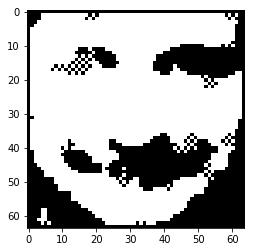

In [286]:
no_epochs = 10
for k in range(no_epochs):
    print("epoch {}:".format(k))
    Q_new = np.zeros_like(Q)
    for i in range(1,63):
        for j in range(1,63):
            q,y = getqy(Q,Y,i,j)
            Q_new[i,j] = calculate_q(q,y)
    Q = Q_new
X_temp = imagize_Q(Q)